## Title: Imputing missing gene expression values using 3D gene conformation data and kriging interpolation  
使用三维基因构象数据和kriging插值填补缺失的基因表达值

#### Background:  
Genes are organized in 3D conformation in the nucleus, and genes closer in spatial proximity tend to be coregulated. While single-cell genomics techniques have profiled gene expression in individual cells, some values are often missing due to technical limitations.

#### Objective:   
The objective of this project is to leverage known population-level 3D gene conformations to impute missing gene expression values in single cells.

#### Method:   
We will first obtain the spatial covariance matrix of gene-gene distances using population-level Hi-C or other 3D genome data. For individual cells with partial expression measurements, we will apply kriging interpolation - a geostatistical technique using the spatial covariance matrix and known expression values to predict the missing values.

#### Expected outcomes:  
We expect this method can more accurately impute missing gene expression compared to alternative methods without using spatial information. It could help improve downstream analyses like cell clustering and trajectory inference from single cell expression data.

The proposed method leverages 3D genome architecture to address a common challenge in single cell genomics data analysis. 


### 任务描述  
将geography里的kriging interpolation应用到gene 3D conformation

- 了解kriging interpolation以及相关的python包
- 已知所有细胞共享的gene 3D conformation，获得gene-gene spatial covariance
- 单个细胞中有部分的基因表达未知，使用covariance矩阵以及已知的基因表达值，impute未知基因表达值


### kriging interpolation

- **基本假设与核心思想**
  - 一点的属性值与其周围点的属性值有关，且可以由其周围点的属性值推导出

- **地理学第一定律**
  - 所有事物都与其他事物相关，但是近处的事物比远处的事物更相关

- **克里金插值核心思想**
  - 两点属性值差异性（不相关性）与二者间距离存在一定距离范围内成正相关

### Input

In [2]:
%pip install anndata

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Speranza\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install --upgrade h5py

Could not fetch URL https://pypi.org/simple/h5py/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/h5py/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Speranza\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import anndata
adata = anndata.read_h5ad('input\\adata.h5ad')

In [5]:
# 基因表达矩阵：矩阵的每一行表示一个细胞，每一列表示一个基因。
# cell x gene count n*m
adata.to_df()

,LGALS3,SERPINA1,FAS,KITLG,VCAN,CD53,BMP4,NEAT1,CD63,LYZ,...,FABP4,CD69,NegPrb7,TNFRSF10A,NegPrb17,MMP12,FGF12,IFNA1,NRIP3,DPP4
c_2_1_311,7.0,1.0,4.0,1.0,3.0,5.0,1.0,11.0,7.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_1_383,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_1_513,0.0,0.0,0.0,1.0,3.0,1.0,0.0,6.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_1_525,2.0,2.0,0.0,0.0,5.0,0.0,0.0,14.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_1_589,1.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_2_30_3778,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_30_3808,0.0,1.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_30_3947,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_30_3987,1.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
# 三维基因构象数据：矩阵的每一行表示一个基因，每一列表示一个空间维度（X、Y、Z）
# conformation n*m'
adata.uns['X']

,0,1,2
MZT2A,-1.034772,-1.038119,1.027191
DUSP5,0.525707,0.871228,0.016519
MALAT1,-1.425137,-1.816856,1.324489
CD74,2.380802,-2.017883,1.560988
COL9A2,-0.225960,1.865090,0.051355
...,...,...,...
CASP8,1.764979,0.452462,-0.061717
NR3C1,1.513145,-0.358040,-1.000590
AZU1,-2.397397,-3.401837,0.922211
BEST1,-1.048677,1.237246,-0.163087


In [7]:
# 基因表达矩阵
# cell x gene count n*m'
adata.to_df()[adata.uns['X'].index]

,MZT2A,DUSP5,MALAT1,CD74,COL9A2,NEAT1,TYK2,HLA-B,PSAP,SRGN,...,LAMP2,CCL4L2,STAT5A,LIF,NANOG,CASP8,NR3C1,AZU1,BEST1,NLRP1
c_2_1_311,19.0,4.0,7.0,9.0,10.0,11.0,7.0,4.0,4.0,12.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
c_2_1_383,10.0,0.0,3.0,2.0,1.0,6.0,4.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_1_513,11.0,1.0,1.0,3.0,0.0,6.0,15.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_1_525,13.0,1.0,5.0,5.0,5.0,14.0,11.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_1_589,6.0,1.0,1.0,0.0,1.0,1.0,8.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_2_30_3778,5.0,2.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_30_3808,9.0,2.0,5.0,1.0,0.0,3.0,13.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_2_30_3947,10.0,4.0,15.0,8.0,1.0,0.0,6.0,4.0,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
c_2_30_3987,3.0,1.0,5.0,3.0,0.0,2.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 所有细胞共享的gene 3D conformation，获得gene-gene spatial covariance
  - **基因的三维构象**
    - 在细胞核内，基因并不是随机分布的，而是有特定的三维构象。这种构象决定了基因之间的空间距离。近距离的基因往往具有更高的共表达和共调控关系。

  - **空间协方差**
    - 空间协方差是指两个基因的表达值之间的依赖关系如何随着它们在三维空间中的距离变化。基于空间距离计算协方差矩阵，可以反映基因在空间中的关系。
#### 步骤1：提取三维基因构象数据

In [8]:
import numpy as np

# 提取三维基因构象数据
gene_3d_conformation = adata.uns['X']

# 打印三维基因构象数据
print("3D Gene Conformation Data:")
print(gene_3d_conformation)

3D Gene Conformation Data:
               0         1         2
MZT2A  -1.034772 -1.038119  1.027191
DUSP5   0.525707  0.871228  0.016519
MALAT1 -1.425137 -1.816856  1.324489
CD74    2.380802 -2.017883  1.560988
COL9A2 -0.225960  1.865090  0.051355
...          ...       ...       ...
CASP8   1.764979  0.452462 -0.061717
NR3C1   1.513145 -0.358040 -1.000590
AZU1   -2.397397 -3.401837  0.922211
BEST1  -1.048677  1.237246 -0.163087
NLRP1  -2.344598 -1.711320  0.088454

[381 rows x 3 columns]


#### 步骤2：计算基因间的欧氏距离

欧氏距离是计算两个点（在这里是两个基因在三维空间中的坐标）之间的直线距离。

##### 欧氏距离公式

对于两个点 $A (x_1, y_1, z_1)$ 和 $B (x_2, y_2, z_2)$，它们之间的欧氏距离计算公式为：
$ d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2} $

- **`pdist`**: 这是SciPy库中的一个函数，用于计算成对距离。它接受一个数组，返回一个压缩的距离矩阵。
- **`coordinates`**: 这是一个包含所有基因在三维空间中的坐标的数组，每行表示一个基因，每列表示一个坐标（X, Y, Z）。
- **`metric='euclidean'`**: 这指定了距离度量方法为欧氏距离。欧氏距离是最常见的距离度量方法之一，表示两点之间的直线距离。

In [9]:
from scipy.spatial.distance import pdist, squareform

# 提取三维坐标
coordinates = gene_3d_conformation.values

# 计算欧氏距离
gene_distances = pdist(coordinates, metric='euclidean')

# 转换为矩阵形式
distance_matrix = squareform(gene_distances)

# 打印距离矩阵
print(distance_matrix)

[[0.         2.66498769 0.92043604 ... 2.73037211 2.56792464 1.74644571]
 [2.66498769 0.         3.5696464  ... 5.25584482 1.62631902 3.86178552]
 [0.92043604 3.5696464  0.         ... 1.90244078 3.4179143  1.5441268 ]
 ...
 [2.73037211 5.25584482 1.90244078 ... 0.         4.95156591 1.88567909]
 [2.56792464 1.62631902 3.4179143  ... 4.95156591 0.         3.23059221]
 [1.74644571 3.86178552 1.5441268  ... 1.88567909 3.23059221 0.        ]]


#### 步骤3：计算空间协方差矩阵

**线性协方差函数 (Linear Covariance Function)**  
  数学公式：
  $ C(h) = \sigma^2 \left(1 - \frac{h}{a}\right), \quad \text{for} \, h \leq a $  
  $ C(h) = 0, \quad \text{for} \, h > a $

  解释：
  线性协方差函数假设协方差随距离线性减小，直到距离达到阈值 $a$，此后协方差为零。该函数适用于短距离相关性较强的情况。

**幂函数协方差函数 (Power Covariance Function)**  
  数学公式：
  $ C(h) = \sigma^2 \left(1 - \left(\frac{h}{a}\right)^p\right), \quad \text{for} \, h \leq a $  
  $ C(h) = 0, \quad \text{for} \, h > a $

  解释：
  幂函数协方差函数使用幂次 $p$ 来控制协方差随距离的减小速度。当 $p$ 为 1 时，该函数变为线性函数。

**高斯协方差函数 (Gaussian Covariance Function)**  
  数学公式：
  $ C(h) = \sigma^2 \exp\left(-\frac{h^2}{2a^2}\right) $  

  解释：
  高斯协方差函数假设协方差随距离的平方指数衰减，适用于具有平滑变化的空间现象。

**球形协方差函数 (Spherical Covariance Function)**  
  数学公式：
  $ C(h) = \sigma^2 \left(1 - 1.5\frac{h}{a} + 0.5\left(\frac{h}{a}\right)^3\right), \quad \text{for} \, h \leq a $  
  $ C(h) = 0, \quad \text{for} \, h > a $

  解释：
  球形协方差函数在距离阈值 $a$ 内，协方差随距离非线性减小，且变化较为平缓，常用于地质和环境数据。

**指数协方差函数 (Exponential Covariance Function)**  
  数学公式：
  $ C(h) = \sigma^2 \exp\left(-\frac{h}{a}\right) $

  解释：
  指数协方差函数假设协方差随距离的指数减小，适用于具有非平滑变化的空间现象。

**洞效应协方差函数 (Hole-effect Covariance Function)**  
  数学公式：
  $ C(h) = \sigma^2 \left(1 - c \frac{\sin(h/a)}{h/a}\right) $

  解释：
  洞效应协方差函数模拟周期性变化的协方差，适用于具有周期性波动的空间现象。


In [36]:
# 定义不同的协方差函数
def linear_covariance(h, sigma2, a):
    return sigma2 * (1 - h / a) * (h <= a)

def power_covariance(h, sigma2, a, p):
    return sigma2 * (1 - (h / a)**p) * (h <= a)

def gaussian_covariance(h, sigma2, a):
    return sigma2 * np.exp(-(h**2) / (2 * a**2))

def spherical_covariance(h, sigma2, a):
    return sigma2 * (1 - 1.5*(h/a) + 0.5*(h/a)**3) * (h <= a)

def exponential_covariance(h, sigma2, a):
    return sigma2 * np.exp(-h / a)

def hole_effect_covariance(h, sigma2, a, c):
    with np.errstate(invalid='ignore'):
        result = sigma2 * (1 - c * np.sin(h / a) / (h / a))
    # 当h为0时，用sigma2替换NaN值
    result[h == 0] = sigma2
    return result


In [37]:
# 参数设置
sigma2 = 1.0
a = 1.0
p = 1.5  # 对于幂协方差函数
c = 0.5  # 对于周期性协方差函数

# 计算不同协方差矩阵
cov_matrices = {
    'linear': linear_covariance(distance_matrix, sigma2, a),
    'power': power_covariance(distance_matrix, sigma2, a, p),
    'gaussian': gaussian_covariance(distance_matrix, sigma2, a),
    'spherical': spherical_covariance(distance_matrix, sigma2, a),
    'exponential': exponential_covariance(distance_matrix, sigma2, a),
    'hole_effect': hole_effect_covariance(distance_matrix, sigma2, a, c)
}

for name, matrix in cov_matrices.items():
    print(f"{name.capitalize()} Covariance Matrix:")
    print(matrix)


Linear Covariance Matrix:
[[ 1.         -0.          0.07956396 ... -0.         -0.
  -0.        ]
 [-0.          1.         -0.         ... -0.         -0.
  -0.        ]
 [ 0.07956396 -0.          1.         ... -0.         -0.
  -0.        ]
 ...
 [-0.         -0.         -0.         ...  1.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.          1.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
   1.        ]]
Power Covariance Matrix:
[[ 1.         -0.          0.11693957 ... -0.         -0.
  -0.        ]
 [-0.          1.         -0.         ... -0.         -0.
  -0.        ]
 [ 0.11693957 -0.          1.         ... -0.         -0.
  -0.        ]
 ...
 [-0.         -0.         -0.         ...  1.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.          1.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
   1.        ]]
Gaussian Covariance Matrix:
[[1.00000000e+00 2.86936428e-02 6

### 单个细胞中有部分的基因表达未知，使用covariance矩阵以及已知的基因表达值，impute未知基因表达值
- 在单细胞RNA测序数据中，基因表达值为0可能有两种解释：

  1. **真实的生物学现象**：在某些细胞中，某些基因的表达确实为0。这种情况表明该基因在该细胞中没有被转录。
  2. **技术原因导致的缺失**：由于测序深度或技术限制，一些基因的表达值可能没有被检测到，尽管它们在实际中可能有非零表达。这种情况通常被称为“dropout”现象。
   
- **对0值进行处理**:  
将这些值视为缺失值并进行插值处理。将0值替换为缺失值（NaN），然后进行Kriging插值

#### 步骤1：存储基因表达矩阵


In [11]:
# 存储基因表达矩阵
gene_expression_matrix = adata.to_df()[adata.uns['X'].index]

# 查看基因表达矩阵的基本信息
print(gene_expression_matrix.info())

# 查看基因表达矩阵的前几行
print(gene_expression_matrix.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, c_2_1_311 to c_2_30_4092
Columns: 381 entries, MZT2A to NLRP1
dtypes: float64(381)
memory usage: 5.2+ MB
None
           MZT2A  DUSP5  MALAT1  CD74  COL9A2  NEAT1  TYK2  HLA-B  PSAP  SRGN  \
c_2_1_311   19.0    4.0     7.0   9.0    10.0   11.0   7.0    4.0   4.0  12.0   
c_2_1_383   10.0    0.0     3.0   2.0     1.0    6.0   4.0    1.0   0.0   6.0   
c_2_1_513   11.0    1.0     1.0   3.0     0.0    6.0  15.0    2.0   0.0   1.0   
c_2_1_525   13.0    1.0     5.0   5.0     5.0   14.0  11.0    2.0   1.0   2.0   
c_2_1_589    6.0    1.0     1.0   0.0     1.0    1.0   8.0    0.0   1.0   5.0   

           ...  LAMP2  CCL4L2  STAT5A  LIF  NANOG  CASP8  NR3C1  AZU1  BEST1  \
c_2_1_311  ...    0.0     0.0     0.0  0.0    1.0    1.0    0.0   0.0    0.0   
c_2_1_383  ...    0.0     0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
c_2_1_513  ...    0.0     0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
c_2_1_525  ...    0.0   

#### 步骤2：将0值替换为NaN

In [12]:
# 将表达矩阵中的0值替换为NaN
gene_expression_matrix_with_nan = gene_expression_matrix.replace(0, np.nan)

# 检查替换后的缺失值情况
missing_values_summary = gene_expression_matrix_with_nan.isnull().sum()
print("将0值替换为NaN后的基因数量:")
print(missing_values_summary[missing_values_summary > 0])

missing_cells_summary = gene_expression_matrix_with_nan.isnull().sum(axis=1)
print("将0值替换为NaN后的细胞数量:")
print(missing_cells_summary[missing_cells_summary > 0])


将0值替换为NaN后的基因数量:
MZT2A       33
DUSP5       54
MALAT1     109
CD74       162
COL9A2     203
          ... 
CASP8     1590
NR3C1     1590
AZU1      1589
BEST1     1587
NLRP1     1589
Length: 381, dtype: int64
将0值替换为NaN后的细胞数量:
c_2_1_311      250
c_2_1_383      311
c_2_1_513      300
c_2_1_525      255
c_2_1_589      316
              ... 
c_2_30_3778    332
c_2_30_3808    305
c_2_30_3947    287
c_2_30_3987    333
c_2_30_4092    349
Length: 1767, dtype: int64


#### 步骤3：选择一个有缺失值的细胞进行插值

In [13]:
# 找到一个有缺失值的细胞
missing_cells = missing_cells_summary[missing_cells_summary > 0]
cell_index = missing_cells.index[0]  # 取第一个有缺失值的细胞作为示例

# 提取这个细胞的基因表达数据
cell_expression = gene_expression_matrix_with_nan.loc[cell_index]

print(f"Cell {cell_index} Original Expression Values (with missing values):")
print(cell_expression)

Cell c_2_1_311 Original Expression Values (with missing values):
MZT2A     19.0
DUSP5      4.0
MALAT1     7.0
CD74       9.0
COL9A2    10.0
          ... 
CASP8      1.0
NR3C1      NaN
AZU1       NaN
BEST1      NaN
NLRP1      NaN
Name: c_2_1_311, Length: 381, dtype: float64


#### 步骤4：进行Kriging插值
克里金插值是一种利用已知点之间的空间相关性来预测未知点值的地统计学方法。协方差矩阵使用负指数函数来计算，这是为了反映点与点之间的空间相关性。

1. **协方差矩阵 $ \mathbf{K} $**:  
    $ \mathbf{K} $ 是已知点之间的协方差矩阵，其元素 $ K_{ij} $ 表示第 $ i $ 个已知点和第 $ j $ 个已知点之间的协方差。
   
2. **协方差向量 $ \mathbf{k} $**:  
    $ \mathbf{k} $ 是未知点与已知点之间的协方差向量，其元素 $ k_i $ 表示未知点和第 $ i $ 个已知点之间的协方差。

3. **已知值向量 $ \mathbf{Z} $**:  
    $ \mathbf{Z} $ 是已知点的值组成的向量。

4. **克里金公式推导**

   克里金插值的基本公式为：
      $ \hat{Z}(u_0) = \sum_{i=1}^{n} \lambda_i Z(u_i) $

   其中 $ \lambda_i $ 是权重，通过以下线性方程组求得：
      $ \mathbf{K} \mathbf{\lambda} = \mathbf{k} $

   求解上述方程组可以得到：
      $ \mathbf{\lambda} = \mathbf{K}^{-1} \mathbf{k} $

   将 $ \mathbf{\lambda} $ 代入插值公式，可以得到：
      $ \hat{Z}(u_0) = \mathbf{k}^T \mathbf{K}^{-1} \mathbf{Z} $



In [17]:
def kriging_interpolation(known_values, covariance_df):
    known_indices = known_values.dropna().index
    unknown_indices = known_values[known_values.isna()].index
    
    # 构建已知和未知的协方差矩阵
    K = covariance_df.loc[known_indices, known_indices].values
    k = covariance_df.loc[unknown_indices, known_indices].values
    
    # 已知值
    known_values_array = known_values.dropna().values
    
    # 计算预测值
    predicted_values = np.dot(np.dot(k, np.linalg.inv(K)), known_values_array)
    
    # 返回插值结果
    result = known_values.copy()
    result[unknown_indices] = predicted_values
    return result


In [38]:
import pandas as pd

# 找到一个有缺失值的细胞
missing_cells_summary = gene_expression_matrix_with_nan.isnull().sum(axis=1)
missing_cells = missing_cells_summary[missing_cells_summary > 0]
cell_index = missing_cells.index[0]  # 取第一个有缺失值的细胞作为示例

# 提取这个细胞的基因表达数据
cell_expression = gene_expression_matrix_with_nan.loc[cell_index]

print(f"Cell {cell_index} Original Expression Values (with missing values):")
print(cell_expression)

# 对选定的细胞进行不同协方差函数的插值
imputed_results = {}
for name, matrix in cov_matrices.items():
    imputed_expression = kriging_interpolation(cell_expression, pd.DataFrame(matrix, index=gene_expression_matrix_with_nan.columns, columns=gene_expression_matrix_with_nan.columns))
    imputed_results[name] = imputed_expression
    print(f"Cell {cell_index} Imputed Expression Values (after {name} kriging):")
    print(imputed_expression)


Cell c_2_1_311 Original Expression Values (with missing values):
MZT2A     19.0
DUSP5      4.0
MALAT1     7.0
CD74       9.0
COL9A2    10.0
          ... 
CASP8      1.0
NR3C1      NaN
AZU1       NaN
BEST1      NaN
NLRP1      NaN
Name: c_2_1_311, Length: 381, dtype: float64
Cell c_2_1_311 Imputed Expression Values (after linear kriging):
MZT2A     19.000000
DUSP5      4.000000
MALAT1     7.000000
CD74       9.000000
COL9A2    10.000000
            ...    
CASP8      1.000000
NR3C1      0.520039
AZU1       0.000000
BEST1      0.049398
NLRP1      0.271716
Name: c_2_1_311, Length: 381, dtype: float64
Cell c_2_1_311 Imputed Expression Values (after power kriging):
MZT2A     19.000000
DUSP5      4.000000
MALAT1     7.000000
CD74       9.000000
COL9A2    10.000000
            ...    
CASP8      1.000000
NR3C1      4.576533
AZU1       0.000000
BEST1     -1.458920
NLRP1      0.378486
Name: c_2_1_311, Length: 381, dtype: float64
Cell c_2_1_311 Imputed Expression Values (after gaussian kriging):

### 使用Mask评估kriging插值结果

**遮蔽部分已知的基因表达值：**  
    从基因表达矩阵中随机选择部分已知值，将其设置为NaN，以模拟缺失值。  

**对不同的协方差函数进行插值：**  
    使用多种协方差函数对遮蔽后的基因表达矩阵进行插值。  
    
**评估插值效果：**  
    通过比较插值值与原始值之间的误差，评估不同协方差函数的效果。  

##### 将表达矩阵中的 0 值替换为 NaN，并遮蔽部分已知值

In [40]:
import numpy as np

# 随机遮蔽部分已知值
def mask_known_values(matrix, mask_fraction=0.1):
    masked_matrix = matrix.copy()
    mask = np.random.rand(*masked_matrix.shape) < mask_fraction
    masked_matrix[mask] = np.nan
    return masked_matrix, mask

# 选择遮蔽 10% 的值
masked_gene_expression_matrix, mask = mask_known_values(gene_expression_matrix_with_nan.values, mask_fraction=0.1)

# 将遮蔽后的矩阵转为 DataFrame
masked_gene_expression_matrix_df = pd.DataFrame(masked_gene_expression_matrix, index=gene_expression_matrix.index, columns=gene_expression_matrix.columns)

print("Masked Gene Expression Matrix:")
print(masked_gene_expression_matrix_df)


Masked Gene Expression Matrix:
             MZT2A  DUSP5  MALAT1  CD74  COL9A2  NEAT1  TYK2  HLA-B  PSAP  \
c_2_1_311     19.0    4.0     7.0   9.0     NaN   11.0   7.0    4.0   4.0   
c_2_1_383     10.0    NaN     3.0   2.0     NaN    6.0   4.0    1.0   NaN   
c_2_1_513     11.0    NaN     1.0   3.0     NaN    6.0  15.0    2.0   NaN   
c_2_1_525     13.0    1.0     5.0   5.0     5.0   14.0  11.0    2.0   1.0   
c_2_1_589      6.0    1.0     1.0   NaN     NaN    NaN   8.0    NaN   1.0   
...            ...    ...     ...   ...     ...    ...   ...    ...   ...   
c_2_30_3778    5.0    2.0     1.0   1.0     1.0    NaN   1.0    3.0   3.0   
c_2_30_3808    NaN    2.0     5.0   1.0     NaN    3.0  13.0    5.0   NaN   
c_2_30_3947   10.0    4.0    15.0   8.0     1.0    NaN   6.0    4.0   NaN   
c_2_30_3987    3.0    1.0     5.0   3.0     NaN    2.0   3.0    NaN   NaN   
c_2_30_4092    2.0    1.0     NaN   1.0     NaN    1.0   NaN    NaN   NaN   

             SRGN  ...  LAMP2  CCL4L2  STAT5

##### 对遮蔽后的矩阵进行插值

In [41]:
# 定义 kriging 插值函数
def kriging_interpolation(known_values, covariance_df):
    known_indices = known_values.dropna().index
    unknown_indices = known_values[known_values.isna()].index
    
    # 构建已知和未知的协方差矩阵
    K = covariance_df.loc[known_indices, known_indices].values
    k = covariance_df.loc[unknown_indices, known_indices].values
    
    # 已知值
    known_values_array = known_values.dropna().values
    
    # 计算预测值
    predicted_values = np.dot(np.dot(k, np.linalg.inv(K)), known_values_array)
    
    # 返回插值结果
    result = known_values.copy()
    result[unknown_indices] = predicted_values
    return result

# 对遮蔽后的矩阵进行插值
def apply_kriging_interpolation(masked_matrix_df, covariance_matrices):
    imputed_results = {}
    for name, matrix in covariance_matrices.items():
        imputed_matrix = masked_matrix_df.copy()
        for cell_index in masked_matrix_df.index:
            cell_expression = masked_matrix_df.loc[cell_index]
            imputed_expression = kriging_interpolation(cell_expression, pd.DataFrame(matrix, index=masked_matrix_df.columns, columns=masked_matrix_df.columns))
            imputed_matrix.loc[cell_index] = imputed_expression
        imputed_results[name] = imputed_matrix
    return imputed_results

imputed_results = apply_kriging_interpolation(masked_gene_expression_matrix_df, cov_matrices)

for name, imputed_matrix in imputed_results.items():
    print(f"Imputed Gene Expression Matrix (using {name} covariance):")
    print(imputed_matrix)


Imputed Gene Expression Matrix (using linear covariance):
                 MZT2A     DUSP5     MALAT1      CD74    COL9A2      NEAT1  \
c_2_1_311    19.000000  4.000000   7.000000  9.000000  0.688882  11.000000   
c_2_1_383    10.000000  1.796857   3.000000  2.000000  0.534038   6.000000   
c_2_1_513    11.000000  6.047954   1.000000  3.000000  2.695342   6.000000   
c_2_1_525    13.000000  1.000000   5.000000  5.000000  5.000000  14.000000   
c_2_1_589     6.000000  1.000000   1.000000  0.299924  0.664421  -0.115746   
...                ...       ...        ...       ...       ...        ...   
c_2_30_3778   5.000000  2.000000   1.000000  1.000000  1.000000   0.223746   
c_2_30_3808   2.042105  2.000000   5.000000  1.000000  0.634415   3.000000   
c_2_30_3947  10.000000  4.000000  15.000000  8.000000  1.000000   4.119684   
c_2_30_3987   3.000000  1.000000   5.000000  3.000000  0.142699   2.000000   
c_2_30_4092   2.000000  1.000000   0.566421  1.000000  0.000000   1.000000   

     

##### 评估插值效果

通过比较插值后的值与原始值的均方根误差（RMSE）来评估插值效果的原理，主要是基于衡量预测值与实际值之间的差异。以下是详细解释：

**RMSE 的定义**

均方根误差（Root Mean Square Error, RMSE）是用来衡量预测值与实际值之间差异的指标，其计算公式为：

$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2} $

其中：
- $ n $ 是样本数量。
- $ \hat{y}_i $ 是第 $ i $ 个预测值。
- $ y_i $ 是第 $ i $ 个实际值。
- $ (\hat{y}_i - y_i)^2 $ 表示预测值与实际值之间的误差的平方。

In [42]:
# 计算插值误差
def calculate_rmse(original_matrix, imputed_matrix, mask):
    mse = np.nanmean((original_matrix[mask] - imputed_matrix[mask]) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# 评估不同协方差函数的插值效果
rmse_results = {}
for name, imputed_matrix in imputed_results.items():
    rmse = calculate_rmse(gene_expression_matrix_with_nan.values, imputed_matrix.values, mask)
    rmse_results[name] = rmse
    print(f"RMSE (using {name} covariance): {rmse}")

# 找到最优的协方差函数
best_covariance_function = min(rmse_results, key=rmse_results.get)
print(f"Best covariance function: {best_covariance_function} with RMSE: {rmse_results[best_covariance_function]}")


RMSE (using linear covariance): 4.300213465942068
RMSE (using power covariance): 388.2221104202859
RMSE (using gaussian covariance): 123.58440152151563
RMSE (using spherical covariance): 3.85020208578485
RMSE (using exponential covariance): 3.554945393426446
RMSE (using hole_effect covariance): 1905.916001067596
Best covariance function: exponential with RMSE: 3.554945393426446


- **最佳协方差函数**：指数协方差函数（Exponential covariance）表现最佳，RMSE 最低，为 3.5549。
- **表现较好的函数**：球形协方差函数（Spherical covariance）和线性协方差函数（Linear covariance）的 RMSE 分别为 3.8502 和 4.3002，表现也较好。
- **表现较差的函数**：幂协方差函数（Power covariance）、高斯协方差函数（Gaussian covariance）和周期性协方差函数（Hole-effect covariance）表现较差，RMSE 较高。

### Simulation
**强假设** 忽略原始基因的真实三维分布，使用理想化或合成的点云数据进行分析和验证。  
生成一个规则的点云数据，然后在该数据上进行网格化处理，以测试和验证插值方法。



In [9]:
%pip install pyvista --upgrade
%pip install trame --upgrade
%pip install vtk --upgrade

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Speranza\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Speranza\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Speranza\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#### 生成点云并生成网格

**生成球坐标系的点**
生成从-1到1的均匀分布的z值，这样在z轴方向上，每两个相邻点之间的距离是相同的，从而确保在整个z轴范围内的均匀分布。  
对于每个z值，生成一个随机的方位角theta，其范围从0到2π，确保在xy平面上的分布是均匀的。  
半径r可以通过单位球的方程$r = \sqrt{(1 - z^2)}$计算，这确保了点在xy平面上的投影是一个圆。  

**转换为笛卡尔坐标系的点**：
   - 使用球坐标转换公式将球坐标转换为笛卡尔坐标：  
     $
     \begin{aligned}
     x &= r \sin(\phi) \cos(\theta) \\
     y &= r \sin(\phi) \sin(\theta) \\
     z &= r \cos(\phi)
     \end{aligned}
     $

由于z值是均匀分布的，并且在每个z值层上，点在xy平面上均匀分布，这样生成的点云在三维空间内的分布是均匀的，且在z轴方向上具有平滑的渐变。

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform

np.random.seed(0)  # 设置随机种子以保证结果可重复

# 生成381个均匀分布在单位球上的点
num_genes = 381

# 生成均匀分布的z值
z = np.linspace(-1, 1, num_genes)
theta = np.random.uniform(0, 2 * np.pi, num_genes)
r = np.sqrt(1 - z**2)  # 半径在xy平面的投影

# 球坐标系转换为笛卡尔坐标系
x = r * np.cos(theta)
y = r * np.sin(theta)

# 创建点云数据
gene_3d_conformation = np.vstack((x, y, z)).T

gene_3d_conformation_df = pd.DataFrame(gene_3d_conformation)

gene_3d_conformation_df

,0,1,2
0,-0.000000,-0.000000,-1.000000
1,-0.022233,-0.100022,-0.994737
2,-0.115581,-0.087080,-0.989474
3,-0.170010,-0.049257,-0.984211
4,-0.181076,0.094199,-0.978947
...,...,...,...
376,0.058657,-0.195503,0.978947
377,0.171208,-0.044916,0.984211
378,-0.139736,0.037625,0.989474
379,-0.086171,-0.055436,0.994737


#### 生成基因表达数据并进行遮蔽

##### **空间特征相关性**
直接随机填补381个基因的表达数据的结果不能体现出基因表达结果与其空间特征的关联性。 
所以我们在强假设下随机的时候要设计出基因表达的结果要随着z轴的大小相关联，但是又要保持一定的随机性。  

**解决方案：**  
- 基因表达值与z轴相关联：基因表达值的基线与z轴正相关，通过公式$base\_expression = (z + 1) / 2$将z轴值线性映射到0到1的范围。  
- 添加随机性：在基线表达值上添加一定的随机噪声，使得基因表达数据既与z轴相关联又保有随机性。
  
##### **具有聚类特征的基因表达**
为了生成具有聚类意义的基因表达结果，我们可以通过人为地指定一些基因的表达模式来模拟不同的细胞群体。 

**解决方案：**  
- 划分基因组：将381个基因随机划分为三组，每组127个基因。
- 生成三种细胞类型：每种细胞类型中的基因高表达一个基因组，其他基因组低表达。
- 添加随机噪声：在指定表达模式的基础上添加适量的随机噪声。


In [92]:
import pandas as pd
import numpy as np

# 划分基因组
gene_groups = np.array_split(np.random.permutation(num_genes), 3)

# 生成模拟基因表达数据：100个细胞，381个基因
num_cells = 100
simulated_gene_expression = np.zeros((num_cells, num_genes))

# # 使得基因表达值随着z轴的值变化，同时保持一定的随机性
# for i in range(num_cells):
#     base_expression = (z + 1) / 2  # 基因表达值与z轴正相关，范围从0到1
#     random_noise = np.random.normal(0, 0.1, num_genes)  # 添加一定的随机噪声
#     simulated_gene_expression[i, :] = base_expression + random_noise

# 为三种细胞类型分别生成基因表达数据
for cell_type in range(3):
    for i in range(num_cells // 3):
        cell_index = cell_type * (num_cells // 3) + i
        # 基因表达值与z轴正相关，范围从0到1，同时添加一定的随机噪声
        base_expression = (z + 1) / 2
        random_noise = np.random.normal(0, 0.1, num_genes)
        base_expression_with_noise = base_expression + random_noise
        # 高表达对应基因组，其他基因组低表达（设置为0）
        cell_expression = np.zeros(num_genes)
        cell_expression[gene_groups[cell_type]] = base_expression_with_noise[gene_groups[cell_type]]
        simulated_gene_expression[cell_index, :] = cell_expression

# 将生成的基因表达数据转换为DataFrame
simulated_gene_expression = pd.DataFrame(simulated_gene_expression)
print("Simulated Gene Expression Matrix with Spatial Correlation:")
print(simulated_gene_expression)



Simulated Gene Expression Matrix with Spatial Correlation:
         0         1    2         3         4         5         6         7    \
0   0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.096243   
1   0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.049183   
2   0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000 -0.018182   
3   0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000 -0.036066   
4   0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000 -0.045082   
..       ...       ...  ...       ...       ...       ...       ...       ...   
95 -0.014172  0.066612  0.0 -0.016064  0.030586  0.099838 -0.058108  0.000000   
96  0.139985  0.204718  0.0 -0.068026  0.022319  0.115045  0.062084  0.000000   
97  0.258312  0.123647  0.0 -0.062019  0.030441  0.036666  0.140714  0.000000   
98  0.164207  0.115255  0.0  0.146060  0.025572 -0.106603  0.230781  0.000000   
99  0.000000  0.000000  0.0  0.000000  0.000000  0

In [93]:
simulated_gene_expression

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096243,0.0,0.226961,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.049183,0.0,0.135088,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.018182,0.0,-0.026114,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.036066,0.0,0.043208,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.045082,0.0,0.258855,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.014172,0.066612,0.0,-0.016064,0.030586,0.099838,-0.058108,0.000000,0.0,0.000000,...,0.0,1.128084,1.008018,1.089924,0.0,0.0,1.019003,0.785866,0.0,0.898842
96,0.139985,0.204718,0.0,-0.068026,0.022319,0.115045,0.062084,0.000000,0.0,0.000000,...,0.0,0.868516,1.073614,0.863507,0.0,0.0,1.001332,1.074226,0.0,1.069143
97,0.258312,0.123647,0.0,-0.062019,0.030441,0.036666,0.140714,0.000000,0.0,0.000000,...,0.0,1.010774,0.997564,1.034435,0.0,0.0,1.056316,0.982090,0.0,0.951678
98,0.164207,0.115255,0.0,0.146060,0.025572,-0.106603,0.230781,0.000000,0.0,0.000000,...,0.0,0.928636,1.064107,1.025783,0.0,0.0,0.913830,0.967974,0.0,0.990930


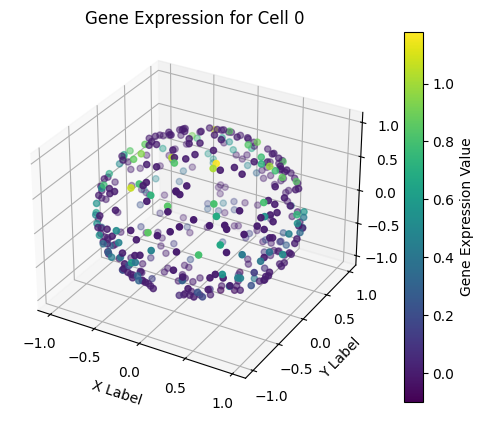

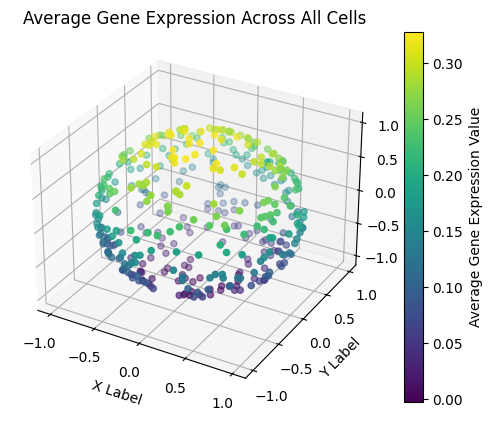

In [94]:
# 可视化第一个细胞的基因表达结果
cell_index = 0  # 选择要可视化的细胞索引
gene_expression_values = simulated_gene_expression.iloc[cell_index, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(gene_3d_conformation[:, 0], gene_3d_conformation[:, 1], gene_3d_conformation[:, 2], c=gene_expression_values, cmap='viridis')
plt.colorbar(sc, label='Gene Expression Value')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title(f"Gene Expression for Cell {cell_index}")
plt.show()

# 可视化所有细胞的平均表达值
average_expression_values = simulated_gene_expression.mean(axis=0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(gene_3d_conformation[:, 0], gene_3d_conformation[:, 1], gene_3d_conformation[:, 2], c=average_expression_values, cmap='viridis')
plt.colorbar(sc, label='Average Gene Expression Value')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Average Gene Expression Across All Cells")
plt.show()


对基因表达数据进行掩蔽，以模拟缺失值。

In [95]:
# 随机遮蔽部分已知值
def mask_known_values(matrix, mask_fraction=0.1):
    masked_matrix = matrix.copy()
    mask = np.random.rand(*masked_matrix.shape) < mask_fraction
    masked_matrix[mask] = np.nan
    return masked_matrix, mask

# 选择遮蔽 70% 的值
simulated_masked_gene_expression_matrix, mask = mask_known_values(simulated_gene_expression.values, mask_fraction=0.7)

# 将遮蔽后的矩阵转为 DataFrame
simulated_masked_gene_expression_matrix_df = pd.DataFrame(simulated_masked_gene_expression_matrix, index=simulated_gene_expression.index, columns=simulated_gene_expression.columns)

print("Masked Gene Expression Matrix:")
print(simulated_masked_gene_expression_matrix_df)


Masked Gene Expression Matrix:
         0         1    2         3         4    5    6         7    8    \
0        NaN       NaN  NaN       NaN       NaN  NaN  NaN       NaN  0.0   
1        NaN  0.000000  0.0  0.000000       NaN  NaN  NaN       NaN  NaN   
2        NaN  0.000000  NaN       NaN       NaN  NaN  NaN -0.018182  NaN   
3        NaN  0.000000  NaN       NaN       NaN  NaN  NaN -0.036066  NaN   
4        NaN       NaN  NaN       NaN       NaN  NaN  0.0       NaN  NaN   
..       ...       ...  ...       ...       ...  ...  ...       ...  ...   
95       NaN  0.066612  NaN       NaN       NaN  NaN  NaN       NaN  NaN   
96       NaN       NaN  NaN       NaN       NaN  NaN  NaN       NaN  0.0   
97  0.258312       NaN  0.0 -0.062019       NaN  NaN  NaN       NaN  0.0   
98       NaN       NaN  NaN       NaN  0.025572  NaN  NaN       NaN  NaN   
99  0.000000       NaN  NaN       NaN       NaN  0.0  NaN       NaN  NaN   

         9    ...  371       372  373  374  375  376  37

In [96]:
simulated_masked_gene_expression_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.135088,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-0.018182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-0.036066,NaN,0.043208,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.000000,NaN,NaN,NaN,0.0,NaN,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,0.066612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.128084,NaN,NaN,NaN,NaN,NaN,0.785866,0.0,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
97,0.258312,NaN,0.0,-0.062019,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
98,NaN,NaN,NaN,NaN,0.025572,NaN,NaN,NaN,NaN,NaN,...,NaN,0.928636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 生成协方差矩阵

In [97]:
from scipy.spatial.distance import pdist, squareform

# 提取三维坐标
coordinates = gene_3d_conformation

# 计算欧氏距离
gene_distances = pdist(coordinates, metric='euclidean')

# 转换为矩阵形式
distance_matrix = squareform(gene_distances)

# 定义不同的协方差函数
def linear_covariance(h, sigma2, a):
    return sigma2 * (1 - h / a) * (h <= a)

def power_covariance(h, sigma2, a, p):
    return sigma2 * (1 - (h / a)**p) * (h <= a)

def gaussian_covariance(h, sigma2, a):
    return sigma2 * np.exp(-(h**2) / (2 * a**2))

def spherical_covariance(h, sigma2, a):
    return sigma2 * (1 - 1.5*(h/a) + 0.5*(h/a)**3) * (h <= a)

def exponential_covariance(h, sigma2, a):
    return sigma2 * np.exp(-h / a)

def hole_effect_covariance(h, sigma2, a, c):
    with np.errstate(invalid='ignore'):
        result = sigma2 * (1 - c * np.sin(h / a) / (h / a))
    # 当h为0时，用sigma2替换NaN值
    result[h == 0] = sigma2
    return result

# 估计 sigma2 的值
known_values = simulated_gene_expression.values.flatten()
sigma2 = np.var(known_values)

# 设置参数
a = 10  # 距离阈值
p = 1.5  # 幂次
c = 0.5  # 常数

# 计算协方差矩阵
linear_cov_matrix = linear_covariance(distance_matrix, sigma2, a)
power_cov_matrix = power_covariance(distance_matrix, sigma2, a, p)
gaussian_cov_matrix = gaussian_covariance(distance_matrix, sigma2, a)
spherical_cov_matrix = spherical_covariance(distance_matrix, sigma2, a)
exponential_cov_matrix = exponential_covariance(distance_matrix, sigma2, a)
hole_effect_cov_matrix = hole_effect_covariance(distance_matrix, sigma2, a, c)

# 将所有协方差矩阵存储在字典中，便于后续使用
covariance_matrices = {
    'linear': linear_cov_matrix,
    'power': power_cov_matrix,
    'gaussian': gaussian_cov_matrix,
    'spherical': spherical_cov_matrix,
    'exponential': exponential_cov_matrix,
    'hole_effect': hole_effect_cov_matrix
}


In [98]:
for name, matrix in covariance_matrices.items():
    print(f"{name.capitalize()} Covariance Matrix:")
    print(matrix)

Linear Covariance Matrix:
[[0.08595409 0.08507221 0.08470693 ... 0.06880857 0.0687859  0.06876327]
 [0.08507221 0.08595409 0.08514278 ... 0.06882819 0.06884063 0.0687859 ]
 [0.08470693 0.08514278 0.08595409 ... 0.06890922 0.06889494 0.06880857]
 ...
 [0.06880857 0.06882819 0.06890922 ... 0.08595409 0.08503003 0.08470693]
 [0.0687859  0.06884063 0.06889494 ... 0.08503003 0.08595409 0.08507221]
 [0.06876327 0.0687859  0.06880857 ... 0.08470693 0.08507221 0.08595409]]
Power Covariance Matrix:
[[0.08595409 0.08586476 0.08580386 ... 0.07829649 0.0782813  0.07826612]
 [0.08586476 0.08595409 0.08587526 ... 0.07830963 0.07831795 0.0782813 ]
 [0.08580386 0.08587526 0.08595409 ... 0.07836382 0.07835428 0.07829649]
 ...
 [0.07829649 0.07830963 0.07836382 ... 0.08595409 0.08585828 0.08580386]
 [0.0782813  0.07831795 0.07835428 ... 0.08585828 0.08595409 0.08586476]
 [0.07826612 0.0782813  0.07829649 ... 0.08580386 0.08586476 0.08595409]]
Gaussian Covariance Matrix:
[[0.08595409 0.08594956 0.0859450

#### 克里金插值
克里金插值函数定义

In [99]:
def kriging_interpolation(known_values, covariance_df):
    known_indices = known_values.dropna().index
    unknown_indices = known_values[known_values.isna()].index

    # 构建已知和未知的协方差矩阵
    K = covariance_df.loc[known_indices, known_indices].values
    k = covariance_df.loc[unknown_indices, known_indices].values

    # 已知值
    known_values_array = known_values.dropna().values

    # 计算预测值
    predicted_values = np.dot(np.dot(k, np.linalg.inv(K)), known_values_array)

    # 返回插值结果
    result = known_values.copy()
    result[unknown_indices] = predicted_values
    return result


进行6种矩阵插值计算

In [100]:
# 对遮蔽后的矩阵进行插值
def apply_kriging_interpolation(masked_matrix_df, covariance_matrices):
    imputed_results = {}
    for name, matrix in covariance_matrices.items():
        imputed_matrix = masked_matrix_df.copy()
        for cell_index in masked_matrix_df.index:
            cell_expression = masked_matrix_df.loc[cell_index]
            imputed_expression = kriging_interpolation(cell_expression, pd.DataFrame(matrix, index=masked_matrix_df.columns, columns=masked_matrix_df.columns))
            imputed_matrix.loc[cell_index] = imputed_expression
        imputed_results[name] = imputed_matrix
    return imputed_results

simulated_imputed_results = apply_kriging_interpolation(simulated_masked_gene_expression_matrix_df, covariance_matrices)

for name, imputed_matrix in simulated_imputed_results.items():
    print(f"Imputed Gene Expression Matrix (using {name} covariance):")
    print(imputed_matrix)

Imputed Gene Expression Matrix (using linear covariance):
         0         1         2         3         4         5         6    \
0   0.019729  0.001385  0.002516  0.006839  0.030561 -0.008860  0.029160   
1   0.025060  0.000000  0.000000  0.000000  0.068880 -0.010773  0.070020   
2  -0.008675  0.000000 -0.006491 -0.009188 -0.010695 -0.009459 -0.010349   
3   0.002524  0.000000  0.003108  0.005726  0.023218  0.001244  0.021416   
4   0.020742  0.011039  0.002842  0.000453  0.007470 -0.001981  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.043626  0.066612  0.039080  0.024294  0.012187  0.026713  0.005948   
96  0.006371  0.025833  0.016262  0.006639 -0.006890  0.030362 -0.008392   
97  0.258312  0.106515  0.000000 -0.062019  0.037486 -0.007746  0.015156   
98  0.063619  0.090681  0.068465  0.050383  0.025572  0.077004  0.020419   
99  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         7         8         

插值结果评估

In [101]:
# 计算插值误差
def calculate_rmse(original_matrix, imputed_matrix, mask):
    mse = np.nanmean((original_matrix[mask] - imputed_matrix[mask]) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# 评估不同协方差函数的插值效果
rmse_results = {}
for name, imputed_matrix in simulated_imputed_results.items():
    rmse = calculate_rmse(simulated_gene_expression.values, imputed_matrix.values, mask)
    rmse_results[name] = rmse
    print(f"RMSE (using {name} covariance): {rmse}")

# 找到最优的协方差函数
best_covariance_function = min(rmse_results, key=rmse_results.get)
print(f"Best covariance function: {best_covariance_function} with RMSE: {rmse_results[best_covariance_function]}")


RMSE (using linear covariance): 0.3356372416700504
RMSE (using power covariance): 0.36172930096439443
RMSE (using gaussian covariance): 17.639820507987487
RMSE (using spherical covariance): 0.33567464555814247
RMSE (using exponential covariance): 0.33560331277876965
RMSE (using hole_effect covariance): 0.29965713973347496
Best covariance function: hole_effect with RMSE: 0.29965713973347496


**有时候得到结果 exponential covariance 的表现结果最好**

kriging插值后点云结果

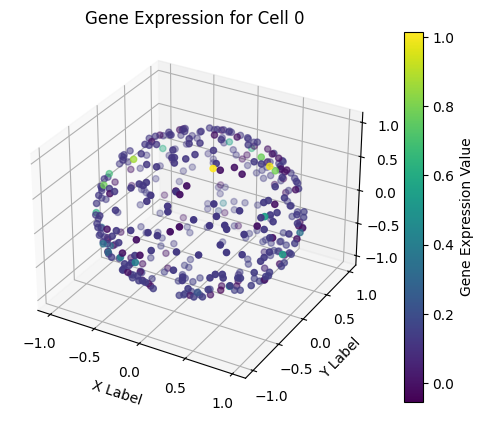

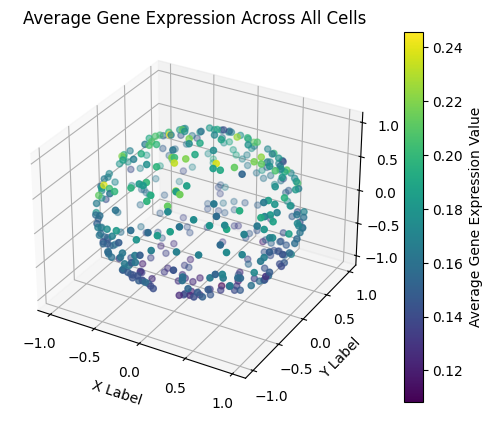

In [102]:
# 可视化第一个细胞的插值结果
cell_index = 0  # 选择要可视化的细胞索引
gene_expression_values = simulated_imputed_results[best_covariance_function].iloc[cell_index, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(gene_3d_conformation[:, 0], gene_3d_conformation[:, 1], gene_3d_conformation[:, 2], c=gene_expression_values, cmap='viridis')
plt.colorbar(sc, label='Gene Expression Value')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title(f"Gene Expression for Cell {cell_index}")
plt.show()

# 可视化所有细胞的平均表达值
average_expression_values = simulated_imputed_results[best_covariance_function].mean(axis=0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(gene_3d_conformation[:, 0], gene_3d_conformation[:, 1], gene_3d_conformation[:, 2], c=average_expression_values, cmap='viridis')
plt.colorbar(sc, label='Average Gene Expression Value')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Average Gene Expression Across All Cells")
plt.show()


### 基因表达数据进行聚类分析
使用K均值聚类算法来对数据进行聚类，并通过可视化来评估插值前后聚类结果的差异。

In [103]:
%pip install scikit-learn seaborn

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


##### 寻找最佳的聚类数：
**轮廓系数（Silhouette Score）：** 计算不同K值下的轮廓系数，选择最大轮廓系数对应的K值。

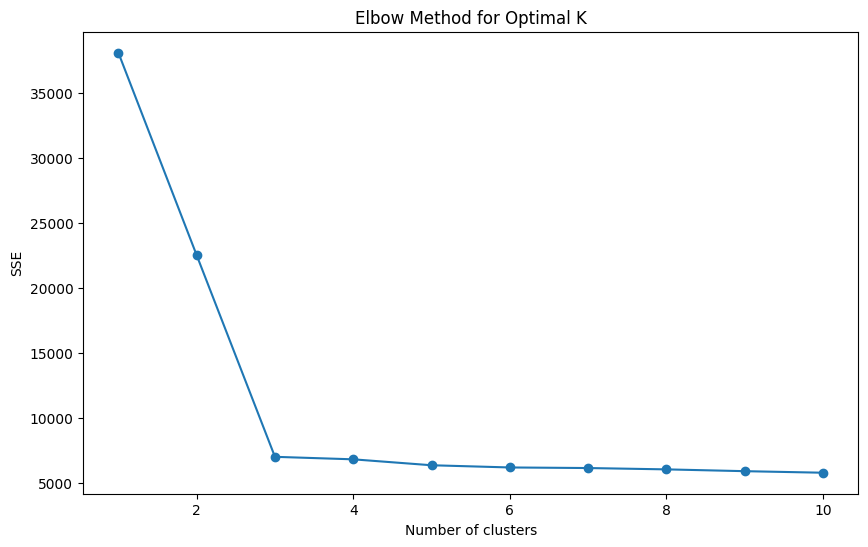

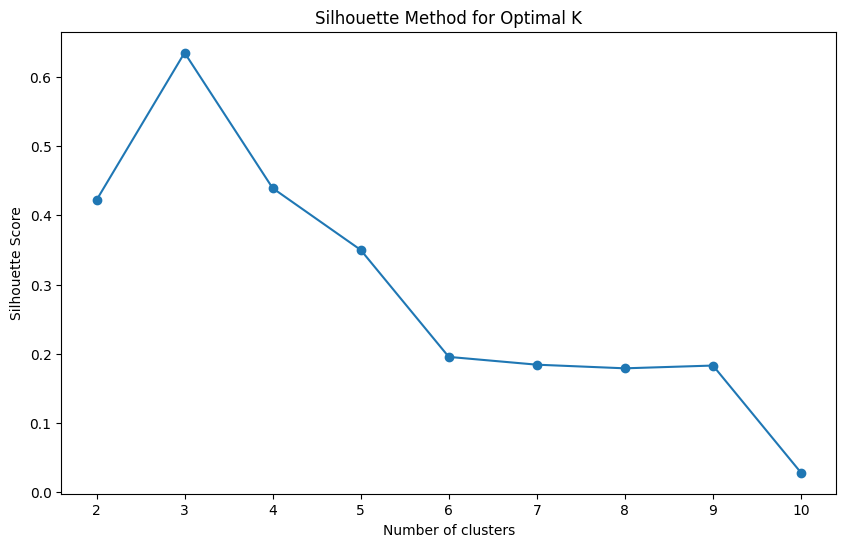

Best number of clusters based on Silhouette Score: 3


In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# 假设 simulated_gene_expression 是原始的基因表达数据矩阵
scaler = StandardScaler()
scaled_data = scaler.fit_transform(simulated_gene_expression)

# 使用肘部法则选择最佳聚类数
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# 使用轮廓系数选择最佳聚类数
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 根据轮廓系数选择最佳聚类数
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters based on Silhouette Score: {best_k}")


##### 可视化聚类结果

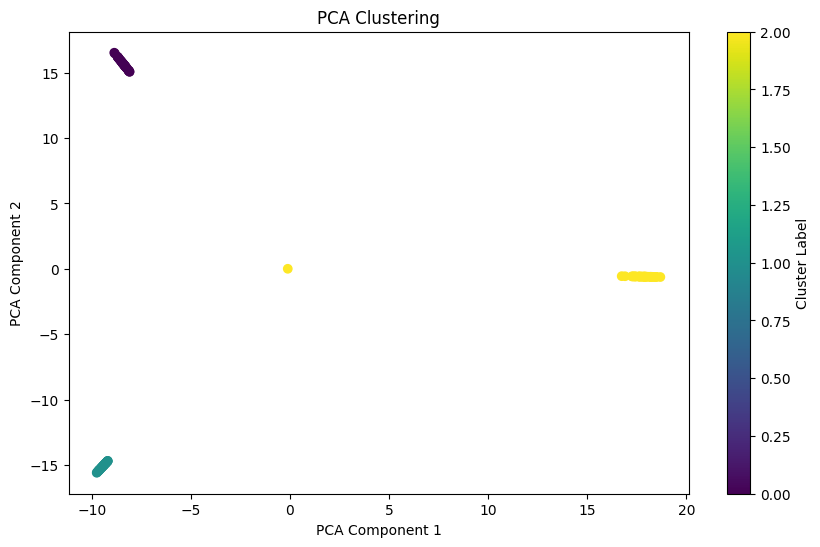

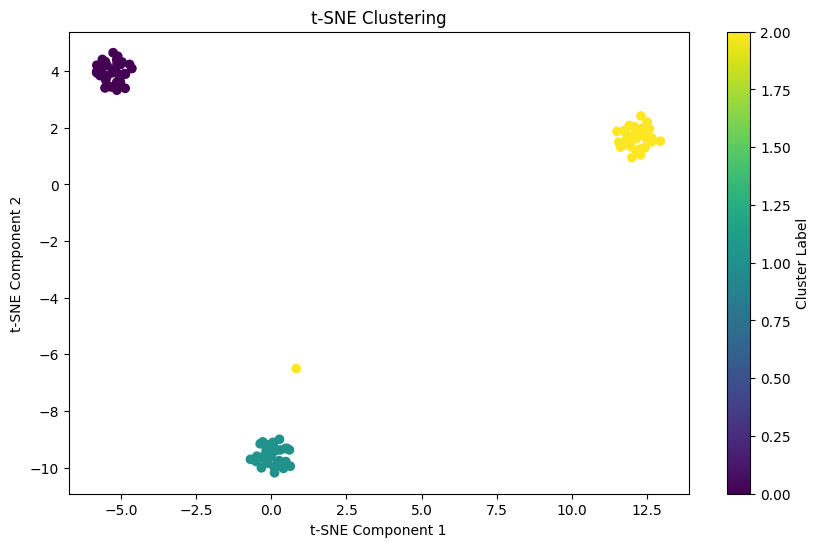

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 对基因表达数据进行标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(simulated_gene_expression)

# 使用PCA降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 使用t-SNE降维
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(scaled_data)

# 使用K-means进行聚类
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# 可视化PCA降维后的聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 可视化t-SNE降维后的聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


### 使用MAGIC进行细胞聚类
MAGIC (Markov Affinity-based Graph Imputation of Cells) 是一种用于基因表达数据插值的方法，可以更好地捕捉细胞之间的关系。  
使用MAGIC来处理我们的基因表达数据，并与之前的克里金插值结果进行比较。

In [106]:
%pip install magic-impute

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [107]:
import magic

# Assuming `simulated_masked_gene_expression_matrix_df` is your data matrix with masked values
magic_operator = magic.MAGIC()

# Perform MAGIC imputation
magic_imputed_data = magic_operator.fit_transform(simulated_masked_gene_expression_matrix_df.fillna(0))

# Convert the imputed data back to a DataFrame
magic_imputed_df = pd.DataFrame(magic_imputed_data, index=simulated_masked_gene_expression_matrix_df.index, columns=simulated_masked_gene_expression_matrix_df.columns)

# Display the imputed data
print("MAGIC Imputed Gene Expression Matrix:")
print(magic_imputed_df)


Calculating MAGIC...
  Running MAGIC on 100 cells and 381 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating imputation...
Calculated MAGIC in 0.02 seconds.
MAGIC Imputed Gene Expression Matrix:
         0         1         2         3         4         5         6    \
0  -0.000059  0.000163 -0.000117  0.000045  0.000446  0.000523  0.000666   
1  -0.000067  0.000126 -0.000092  0.000032  0.000383  0.000404  0.000511   
2  -0.000071  0.000110 -0.000087  0.000028  0.000361  0.000351  0.000441   
3  -0.000072  0.000116 -0.000082  0.000026  0.000363  0.000368  0.000463   
4  -0.000087  0.000135 -0.000110  0.000038  0.000452  0.000433  0.000545   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.001864  0.007874 -0.000070  0.002548  0.008779  0.018884  0.025123   
96  0.002060  0.005071 -0.000081  0.002343  0.007545  0.015882

c:\Users\Speranza\AppData\Local\Programs\Python\Python310\lib\site-packages\graphtools\base.py:165: RuntimeWarning: Cannot perform PCA to 100 dimensions on data with min(n_samples, n_features) = 100
  warnings.warn(


#### 计算MAGIC插值后的RMSE

In [108]:
import pandas as pd
import numpy as np

# 计算MAGIC插值后的RMSE
magic_rmse = calculate_rmse(simulated_gene_expression.values, magic_imputed_df.values, mask)
print(f"RMSE (using MAGIC): {magic_rmse}")


RMSE (using MAGIC): 0.25828899295096625


#### 可视化细胞基因表达点云

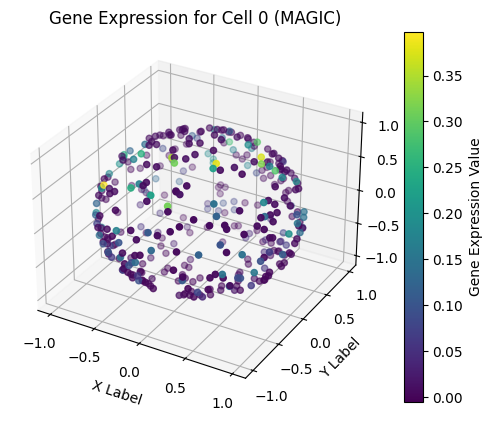

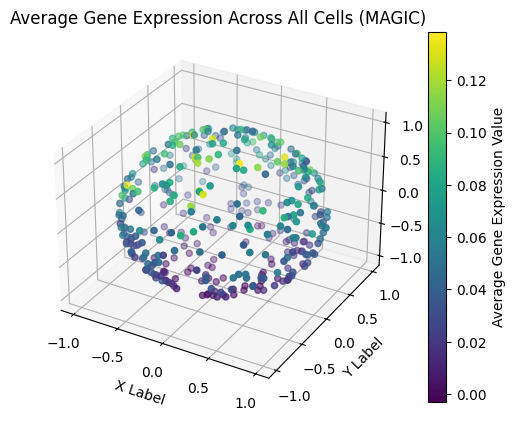

In [109]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 选择要可视化的细胞索引
cell_index = 0
gene_expression_values = magic_imputed_df.iloc[cell_index, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(gene_3d_conformation[:, 0], gene_3d_conformation[:, 1], gene_3d_conformation[:, 2], c=gene_expression_values, cmap='viridis')
plt.colorbar(sc, label='Gene Expression Value')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title(f"Gene Expression for Cell {cell_index} (MAGIC)")
plt.show()

# 计算所有细胞的平均表达值
average_expression_values = magic_imputed_df.mean(axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(gene_3d_conformation[:, 0], gene_3d_conformation[:, 1], gene_3d_conformation[:, 2], c=average_expression_values, cmap='viridis')
plt.colorbar(sc, label='Average Gene Expression Value')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Average Gene Expression Across All Cells (MAGIC)")
plt.show()


#### 聚类结果

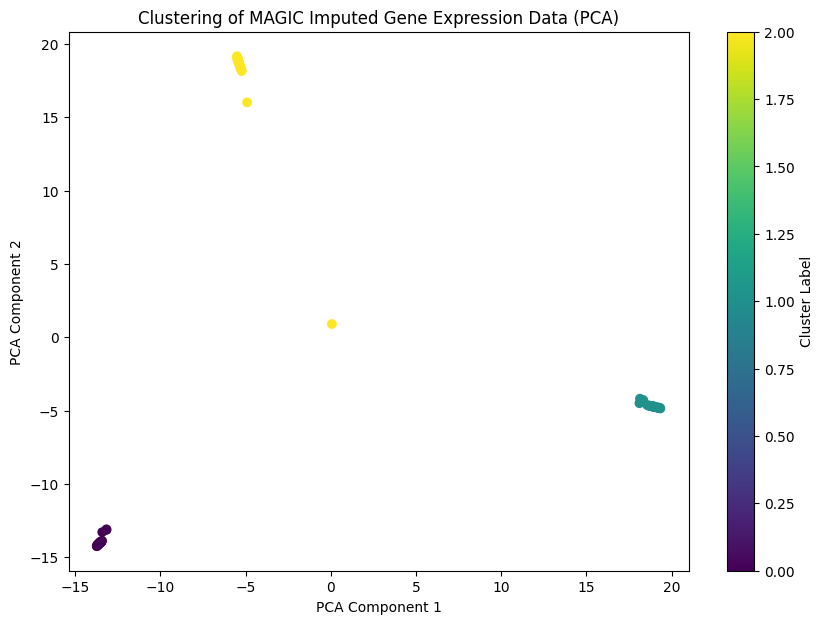

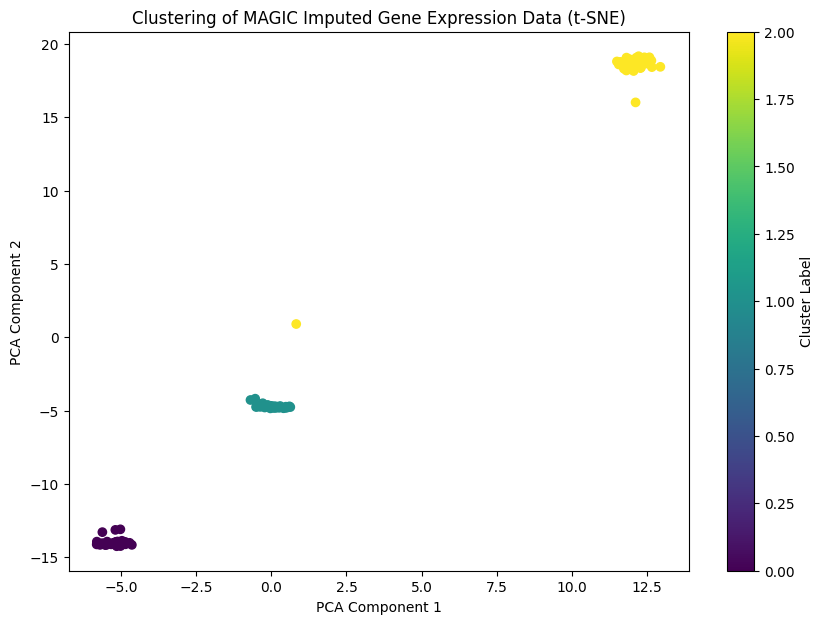

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
magic_scaled_data = scaler.fit_transform(magic_imputed_df)

# Apply PCA for visualization
pca = PCA(n_components=2)
magic_pca_result = pca.fit_transform(magic_scaled_data)

# 使用t-SNE降维
tsne = TSNE(n_components=2, perplexity=30)
magic_tsne_result = tsne.fit_transform(scaled_data)

# Perform clustering
kmeans = KMeans(n_clusters=3)
magic_cluster_labels = kmeans.fit_predict(magic_scaled_data)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(magic_pca_result[:, 0], magic_pca_result[:, 1], c=magic_cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title("Clustering of MAGIC Imputed Gene Expression Data (PCA)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(magic_tsne_result[:, 0], magic_pca_result[:, 1], c=magic_cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title("Clustering of MAGIC Imputed Gene Expression Data (t-SNE)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()